In [1]:
#Basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_DF = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")
credit_DF

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [3]:
credit_DF.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
credit_DF.shape

(1000, 17)

In [5]:
credit_DF.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [6]:
credit_DF.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

### Data Visualization of catagorical column

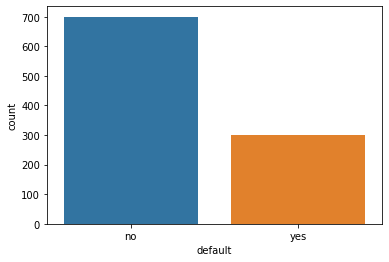

In [7]:
sns.countplot('default',data=credit_DF)

In [8]:
credit_DF['default'].value_counts()*100/len(credit_DF)

no     70.0
yes    30.0
Name: default, dtype: float64

#### as we can see that the case of no defaulter is much greater than the defaulter case so this data is highly imbalamnced which can bias our model towards no defaulter case

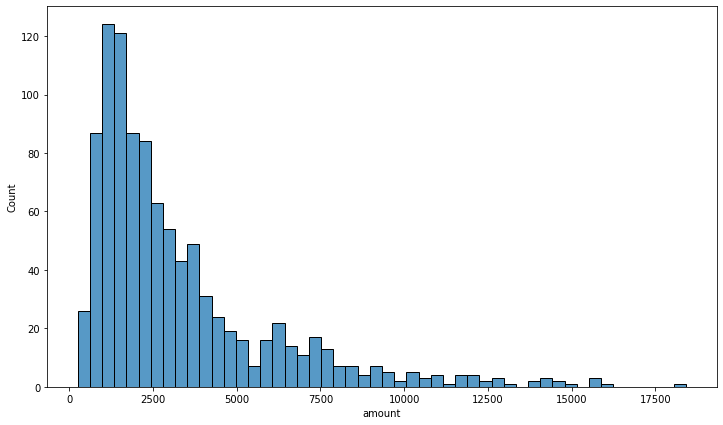

In [9]:
plt.figure(figsize=(12,7))
sns.histplot(credit_DF['amount'],bins=50)

This Graph predicts that distribution of amount is positively skewed most of the customer are getting loan in the range of 1000 to 5000.

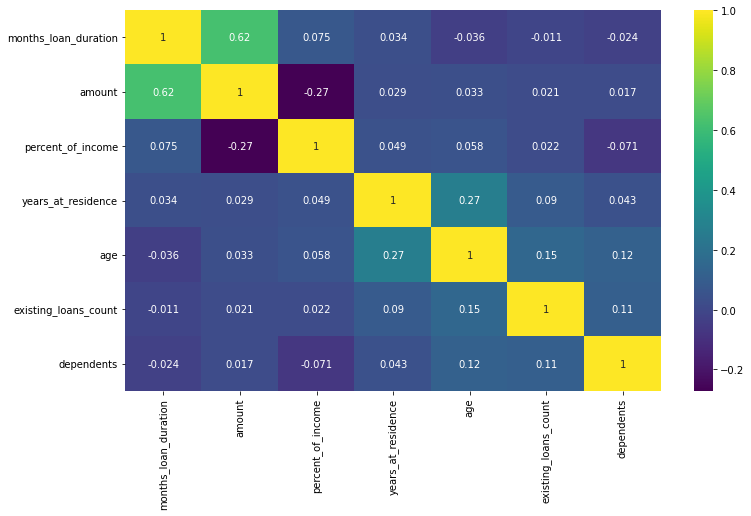

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(credit_DF.corr(),annot=True,cmap='viridis')

#### Months Loan Duration and amount is positively correlated.

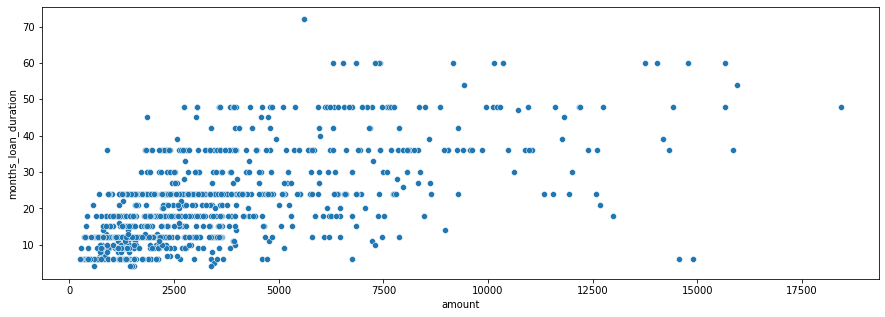

In [11]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='amount',y='months_loan_duration',data=credit_DF)

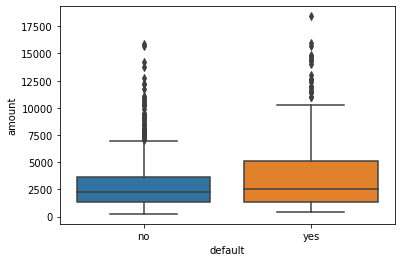

In [12]:
sns.boxplot(x='default',y='amount',data=credit_DF)

In [13]:
credit_DF.groupby('default')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
no,700.0,2985.457143,2401.472278,250.0,1375.5,2244.0,3634.75,15857.0
yes,300.0,3938.126667,3535.818955,433.0,1352.5,2574.5,5141.50,18424.0


#### As we can see that all statisitcal value for defaulter and no defaulter with amount varibale is not that much comparable so it is better to keep both parameters for training.

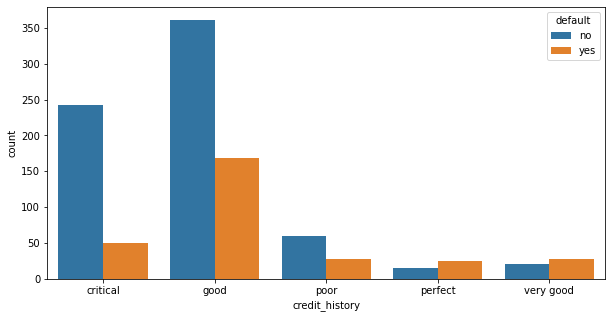

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='credit_history',hue='default',data=credit_DF)

#### From this graph it is concluded that majority of the defaulter is fom good and critical credit history while less people from perfect and very good credit history guaranted the laon which questions the authenticity of granting the loan process.

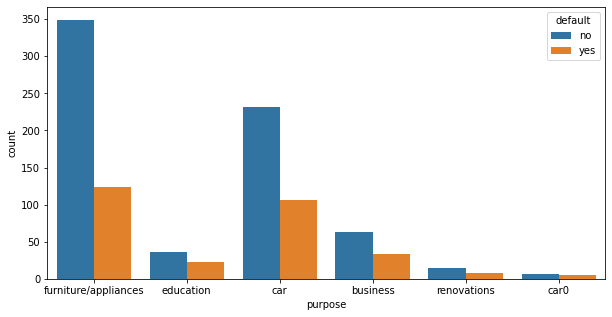

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='default',data=credit_DF)

#### Almost 2/3rd defaulter is who taken loan for furniture/appliances and car.

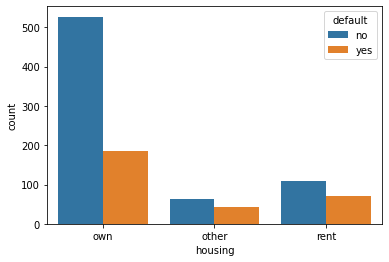

In [16]:
sns.countplot(x='housing',hue='default',data=credit_DF)

#### Almost half of the defaulter is who owns house.

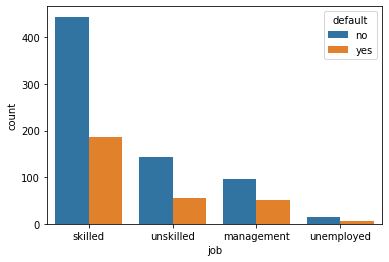

In [17]:
sns.countplot(x='job',hue='default',data=credit_DF)

#### Almost half of the defaulter is skilled person.

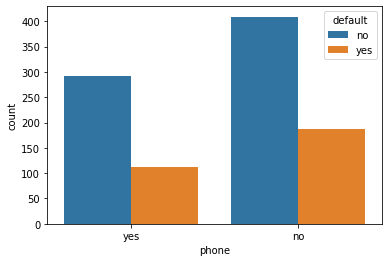

In [18]:
sns.countplot(x='phone',hue='default',data=credit_DF)

#### This reveals that customer who has not phone is more likely to be defaulter. and also it can be seen that most people got the loan who has not phone it again questions the authenticity of granting the loan process.

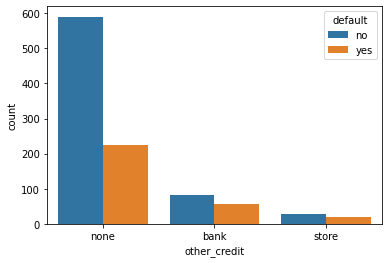

In [19]:
sns.countplot(x='other_credit',hue='default',data=credit_DF)

#### Almost 2/3rd of the defaulter is none credit background.



### Data Visualization of numerical column

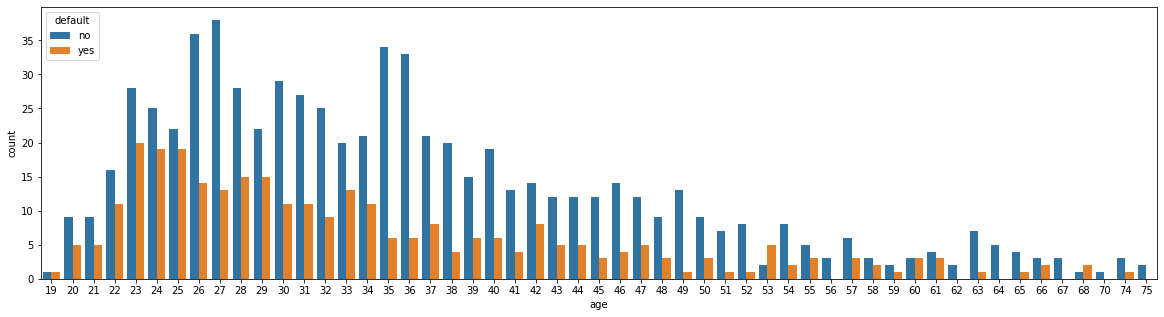

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='age',hue='default',data=credit_DF)

#### This graph tells us that more dfaulter case happened for the age between 22 to 38.

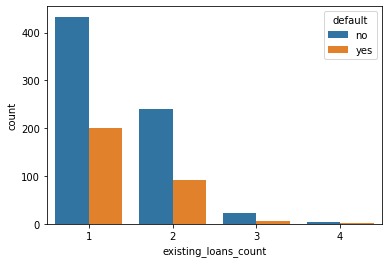

In [21]:
sns.countplot(x='existing_loans_count',hue='default',data=credit_DF)

#### Almost all the defaulters is who has existing loan counts 1 and 2.

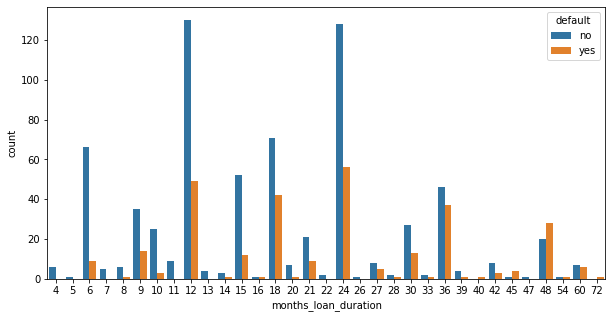

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='months_loan_duration',hue='default',data=credit_DF)

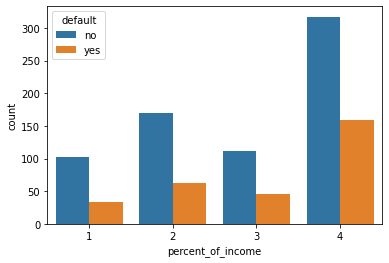

In [23]:
sns.countplot(x='percent_of_income',hue='default',data=credit_DF)

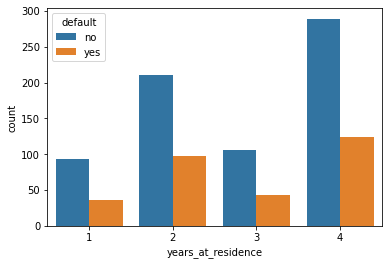

In [24]:
sns.countplot(x='years_at_residence',hue='default',data=credit_DF)

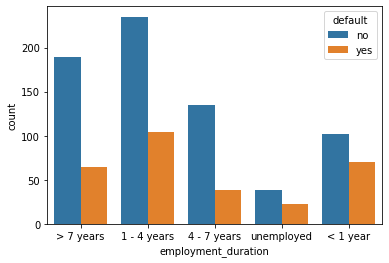

In [25]:
sns.countplot(x='employment_duration',hue='default',data=credit_DF)

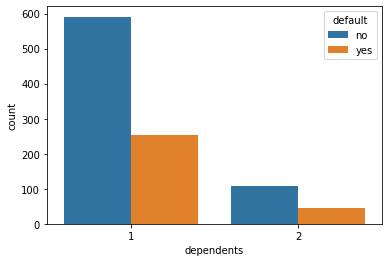

In [26]:
sns.countplot(x='dependents',hue='default',data=credit_DF)

#### Almost 5/6th defaulter has 1 dependents 

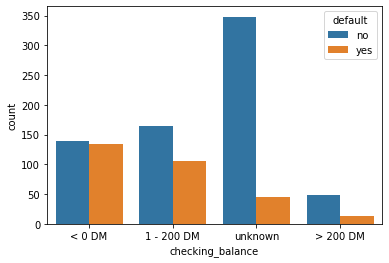

In [27]:
sns.countplot(x='checking_balance',hue='default',data=credit_DF)

#### Notice that customer having <0 DM checking balance has probability nearly 0.5 to be defaulter.
#### As checking balance is increasing the case of defaulter is decreasing in case of unknown checking balance very less defaulter as compared to no defaulter.
#### So it may be assumed that checking balance of unknown row is greater than 100 DM it may also be greater than 200 DM

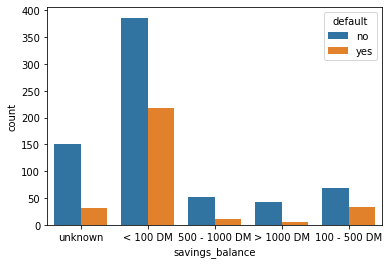

In [28]:
sns.countplot(x='savings_balance',hue='default',data=credit_DF)

#### Almost 2/3rd defaulter is from <100 DM savings balance category. Also see that as savings balance is increasing defaulter case decreasing. Following this pattern it may be assumed that unknown may be the region betweeen 100 - 500.

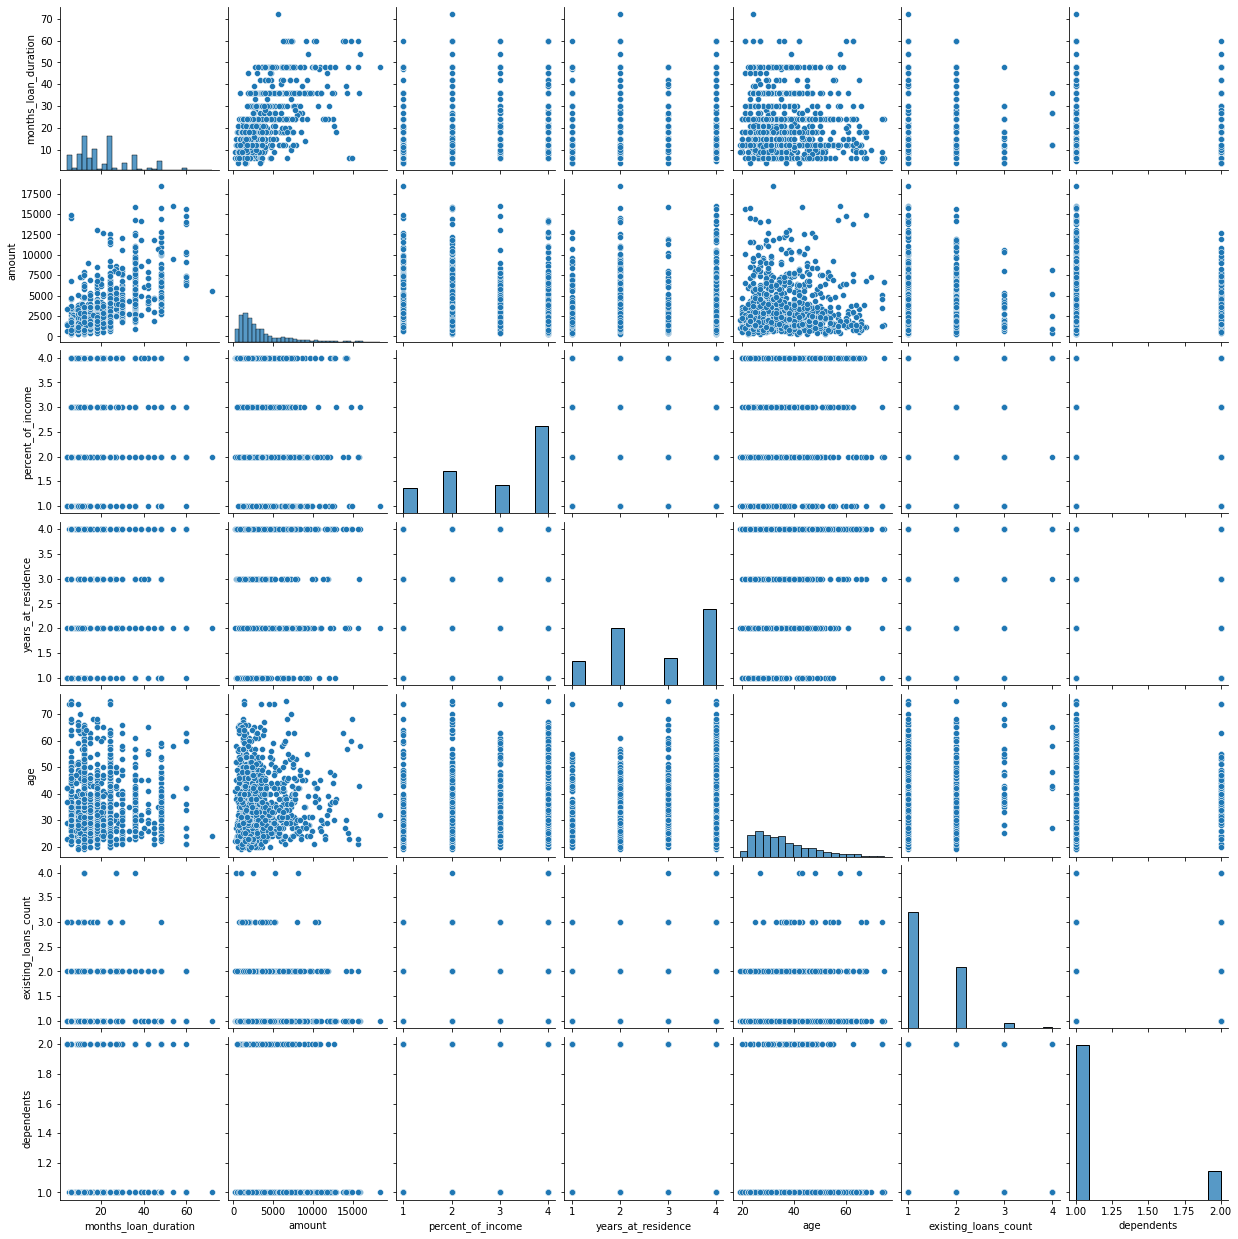

In [29]:
sns.pairplot(credit_DF)

In [30]:
credit_DF.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [31]:
credit_DF.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [32]:
credit_DF["checking_balance"] = credit_DF["checking_balance"].replace('< 0 DM',int(0))
credit_DF["checking_balance"] = credit_DF["checking_balance"].replace('1 - 200 DM',int(100))
credit_DF["checking_balance"] = credit_DF["checking_balance"].replace('> 200 DM',int(300))
credit_DF["checking_balance"] = credit_DF["checking_balance"].replace('unknown',int(200))
credit_DF['checking_balance'].unique()

array([  0, 100, 200, 300])

In [33]:
credit_DF["savings_balance"] = credit_DF["savings_balance"].replace('< 100 DM',int(50))
credit_DF["savings_balance"] = credit_DF["savings_balance"].replace(['100 - 500 DM','unknown'],int(300))
credit_DF["savings_balance"] = credit_DF["savings_balance"].replace('500 - 1000 DM',int(750))
credit_DF["savings_balance"] = credit_DF["savings_balance"].replace('> 1000 DM',int(1000))
credit_DF['savings_balance'].unique()

array([ 300,   50,  750, 1000])

In [34]:
credit_DF['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [35]:
credit_DF["employment_duration"] = credit_DF["employment_duration"].replace('unemployed',int(0))
credit_DF["employment_duration"] = credit_DF["employment_duration"].replace('< 1 year',int(1))
credit_DF["employment_duration"] = credit_DF["employment_duration"].replace('1 - 4 years',int(3))
credit_DF["employment_duration"] = credit_DF["employment_duration"].replace('4 - 7 years',int(6))
credit_DF["employment_duration"] = credit_DF["employment_duration"].replace('> 7 years',int(7))
credit_DF['employment_duration'].unique()

array([7, 3, 6, 0, 1])

In [36]:
print(credit_DF['job'].unique())
print(credit_DF['housing'].unique())
print(credit_DF['phone'].unique())
print(credit_DF['credit_history'].unique())
print(credit_DF['default'].unique())
credit_DF.select_dtypes(['object']).columns

['skilled' 'unskilled' 'management' 'unemployed']
['own' 'other' 'rent']
['yes' 'no']
['critical' 'good' 'poor' 'perfect' 'very good']
['no' 'yes']


Index(['credit_history', 'purpose', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')

In [37]:
# Label encoding
credit_DF["credit_history"] = le.fit_transform(credit_DF["credit_history"])
credit_DF["phone"] = le.fit_transform(credit_DF["phone"])
credit_DF["housing"] = le.fit_transform(credit_DF["housing"])
credit_DF["job"] = le.fit_transform(credit_DF["job"])
credit_DF["default"] = le.fit_transform(credit_DF["default"])

print(credit_DF['housing'].unique())
print(credit_DF['phone'].unique())
print(credit_DF['credit_history'].unique())
credit_DF['job'].unique()
print(credit_DF.default.value_counts())

[1 0 2]
[1 0]
[0 1 3 2 4]
0    700
1    300
Name: default, dtype: int64


In [38]:
dummies=pd.get_dummies(credit_DF[['purpose','other_credit']],
                       columns=['purpose','other_credit'])


In [39]:
columns=['purpose','other_credit']
credit_DF=pd.concat([credit_DF,dummies],axis=1)
credit_DF.drop(columns,axis=1,inplace=True)

In [40]:
credit_DF.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,housing,...,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store
0,0,6,0,1169,300,7,4,4,67,1,...,0,0,0,0,0,1,0,0,1,0
1,100,48,1,5951,50,3,2,2,22,1,...,1,0,0,0,0,1,0,0,1,0
2,200,12,0,2096,50,6,2,3,49,1,...,0,0,0,0,1,0,0,0,1,0
3,0,42,1,7882,50,6,2,4,45,0,...,0,0,0,0,0,1,0,0,1,0
4,0,24,3,4870,50,3,3,4,53,0,...,1,0,1,0,0,0,0,0,1,0


In [41]:
credit_DF.shape

(1000, 24)

In [42]:
X=credit_DF.drop(['default'],axis=1)
y=credit_DF['default']
X.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'housing', 'existing_loans_count', 'job',
       'dependents', 'phone', 'purpose_business', 'purpose_car',
       'purpose_car0', 'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_bank', 'other_credit_none',
       'other_credit_store'],
      dtype='object')

### MinMax Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()

In [44]:
credit_DF['checking_balance']=normalize.fit_transform(credit_DF[['checking_balance']])
credit_DF['months_loan_duration']=normalize.fit_transform(credit_DF[['months_loan_duration']])
credit_DF['amount']=normalize.fit_transform(credit_DF[['amount']])
credit_DF['savings_balance']=normalize.fit_transform(credit_DF[['savings_balance']])
credit_DF['employment_duration']=normalize.fit_transform(credit_DF[['employment_duration']])
credit_DF['percent_of_income']=normalize.fit_transform(credit_DF[['percent_of_income']])
credit_DF['years_at_residence']=normalize.fit_transform(credit_DF[['years_at_residence']])
credit_DF['age']=normalize.fit_transform(credit_DF[['age']])
credit_DF['existing_loans_count']=normalize.fit_transform(credit_DF[['existing_loans_count']])
credit_DF['dependents']=normalize.fit_transform(credit_DF[['dependents']])
credit_DF['housing']=normalize.fit_transform(credit_DF[['housing']])
credit_DF['credit_history']=normalize.fit_transform(credit_DF[['credit_history']])
credit_DF['job']=normalize.fit_transform(credit_DF[['job']])

In [45]:
credit_DF.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,housing,...,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store
0,0.000000,0.029412,0.00,0.050567,0.263158,1.000000,1.000000,1.000000,0.857143,0.5,...,0,0,0,0,0,1,0,0,1,0
1,0.333333,0.647059,0.25,0.313690,0.000000,0.428571,0.333333,0.333333,0.053571,0.5,...,1,0,0,0,0,1,0,0,1,0
2,0.666667,0.117647,0.00,0.101574,0.000000,0.857143,0.333333,0.666667,0.535714,0.5,...,0,0,0,0,1,0,0,0,1,0
3,0.000000,0.558824,0.25,0.419941,0.000000,0.857143,0.333333,1.000000,0.464286,0.0,...,0,0,0,0,0,1,0,0,1,0
4,0.000000,0.294118,0.75,0.254209,0.000000,0.428571,0.666667,1.000000,0.607143,0.0,...,1,0,1,0,0,0,0,0,1,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)


In [47]:
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train)

LogisticRegression()

In [48]:
reg_model.score(X_train,y_train)

0.7714285714285715

In [49]:
reg_model.score(X_test,y_test)

0.75

In [114]:
#importing various algorithms of calssification
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [51]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

In [52]:
#Experiment 1: Applying alogrithm on Sclaed data only
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier()
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       245
           1       0.37      0.58      0.45        55

    accuracy                           0.74       300
   macro avg       0.63      0.68      0.64       300
weighted avg       0.80      0.74      0.76       300

Voting Ensemble:> 0.7433333333333333
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       293
           1       0.05      0.57      0.09         7

    accuracy                           0.72       300
   macro avg       0.52      0.65      0.46       300
weighted avg       0.96      0.72      0.81       300

SVM:> 0.7166666666666667
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       247
           1       0.35      0.57      0.43        53

    accuracy                           0.74       300
   macro avg       0.62      0.67      0.63       300
weighted avg

In [53]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier()
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       243
           1       0.38      0.58      0.46        57

    accuracy                           0.74       300
   macro avg       0.64      0.68      0.65       300
weighted avg       0.79      0.74      0.76       300

GradientBoostingClassifier:> 0.7433333333333333
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       212
           1       0.45      0.44      0.45        88

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.68      0.68       300

DecisionTreeClassifier:> 0.68
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       237
           1       0.38      0.52      0.44        63

    accuracy                           0.72       300
   macro avg       0.62      0.65      0.63       

In [54]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression()
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       231
           1       0.42      0.52      0.46        69

    accuracy                           0.72       300
   macro avg       0.63      0.65      0.64       300
weighted avg       0.75      0.72      0.73       300

LinearDiscriminantAnalysis:> 0.7233333333333334 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       233
           1       0.34      0.43      0.38        67

    accuracy                           0.68       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.71      0.68      0.70       300

KNeighborsClassifier:> 0.6833333333333333
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       216
           1       0.45      0.46      0.46        84

    accuracy                           0.69       300
   macro avg       0.62      0.62   

### Resampling The data

In [55]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [56]:
credit_DF.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [57]:
#To keep original data as it is to use the same for later.
new_data = credit_DF.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.default==0]
df_minority = new_data[new_data.default==1]

#Here we are undersampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_undersampled = resample(df_majority,replace=True,n_samples=300,random_state=123)
df_undersampled = pd.concat([df_majority_undersampled,df_minority])
print("Undersampled data:->\n",df_undersampled.default.value_counts())

Undersampled data:->
 0    300
1    300
Name: default, dtype: int64


In [58]:
df_minority_oversampled = resample(df_minority,replace=True,n_samples=700,random_state=123)
df_oversampled = pd.concat([df_majority,df_minority_oversampled])
print("Upsampled data:->\n",df_oversampled.default.value_counts())

Upsampled data:->
 0    700
1    700
Name: default, dtype: int64


In [59]:
df_undersampled

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,housing,...,default,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store
729,1.000000,0.294118,0.00,0.056399,1.000000,0.428571,0.333333,1.000000,0.303571,0.5,...,0,1,0,0,0,0,0,0,1,0
502,1.000000,0.073529,0.25,0.048201,0.263158,1.000000,0.333333,1.000000,0.535714,0.5,...,0,0,0,0,0,1,0,0,1,0
527,0.666667,0.000000,0.00,0.068945,0.000000,0.857143,0.333333,0.000000,0.410714,0.5,...,0,0,0,0,0,1,0,0,1,0
442,0.333333,0.235294,0.75,0.130901,0.000000,0.428571,0.333333,0.666667,0.178571,0.5,...,0,0,0,1,0,0,0,1,0,0
133,0.666667,0.205882,0.25,0.095411,0.000000,0.428571,1.000000,1.000000,0.500000,0.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.333333,0.161765,1.00,0.055794,0.263158,0.428571,0.333333,0.333333,0.107143,1.0,...,1,0,1,0,0,0,0,0,1,0
980,0.333333,0.382353,0.00,0.447672,0.000000,0.857143,0.333333,0.333333,0.535714,0.5,...,1,0,0,0,0,1,0,0,1,0
981,0.666667,0.647059,0.25,0.252779,0.000000,0.000000,0.666667,0.333333,0.250000,1.0,...,1,1,0,0,0,0,0,1,0,0
983,0.000000,0.470588,0.25,0.439034,0.000000,0.428571,0.333333,0.333333,0.125000,0.5,...,1,0,1,0,0,0,0,0,1,0


In [60]:
df_oversampled.default.value_counts()[1]

700

In [61]:
#Experiment 2: Sclaed + underSampled Data
X = df_undersampled.drop(['default'],axis=1)
y = df_undersampled.default
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [62]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        89
           1       0.62      0.82      0.71        61

    accuracy                           0.73       150
   macro avg       0.73      0.74      0.73       150
weighted avg       0.75      0.73      0.73       150

Voting Ensemble:> 0.7266666666666667
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        77
           1       0.66      0.73      0.69        73

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

SVM:> 0.6866666666666666
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        88
           1       0.61      0.79      0.69        62

    accuracy                           0.71       150
   macro avg       0.71      0.72      0.71       150
weighted avg

In [115]:
Model1 = RandomForestClassifier()
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))

Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier()
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       154
           1       0.95      0.85      0.90       196

    accuracy                           0.89       350
   macro avg       0.89      0.90      0.89       350
weighted avg       0.90      0.89      0.89       350

RandomForestClassifier:> 0.8914285714285715
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       145
           1       0.91      0.78      0.84       205

    accuracy                           0.83       350
   macro avg       0.83      0.84      0.82       350
weighted avg       0.84      0.83      0.83       350

GradientBoostingClassifier:> 0.8257142857142857
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       145
           1       0.91      0.78      0.84       205

    accuracy                           0.83       350
   macro avg       0.83      0.84   

In [64]:
#Experiment 3: Sclaed + overSampled Data
X = df_oversampled.drop(["default"],axis=1)
y = df_oversampled.default
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

1400 1400


In [65]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       145
           1       0.91      0.78      0.84       205

    accuracy                           0.83       350
   macro avg       0.83      0.84      0.82       350
weighted avg       0.84      0.83      0.83       350

Voting Ensemble:> 0.8257142857142857
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       156
           1       0.77      0.70      0.74       194

    accuracy                           0.72       350
   macro avg       0.72      0.72      0.72       350
weighted avg       0.73      0.72      0.72       350

SVM:> 0.72
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       146
           1       0.89      0.76      0.82       204

    accuracy                           0.81       350
   macro avg       0.81      0.81      0.80       350
weighted avg       0.82   

In [66]:
Model1 = RandomForestClassifier()
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))

Model3 = DecisionTreeClassifier()
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       161
           1       0.94      0.88      0.91       189

    accuracy                           0.91       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.91      0.91      0.91       350

RandomForestClassifier:> 0.9057142857142857
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       145
           1       0.91      0.78      0.84       205

    accuracy                           0.83       350
   macro avg       0.83      0.84      0.82       350
weighted avg       0.84      0.83      0.83       350

GradientBoostingClassifier:> 0.8257142857142857
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       148
           1       0.90      0.79      0.84       202

    accuracy                           0.83       350
   macro avg       0.83      0.84   

In [67]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression()
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       173
           1       0.73      0.73      0.73       177

    accuracy                           0.73       350
   macro avg       0.73      0.73      0.73       350
weighted avg       0.73      0.73      0.73       350

LinearDiscriminantAnalysis:> 0.7285714285714285 

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       185
           1       0.72      0.76      0.74       165

    accuracy                           0.75       350
   macro avg       0.75      0.75      0.75       350
weighted avg       0.75      0.75      0.75       350

KNeighborsClassifier:> 0.7457142857142857
              precision    recall  f1-score   support

           0       0.78      0.63      0.70       214
           1       0.55      0.71      0.62       136

    accuracy                           0.66       350
   macro avg       0.66      0.67   

#### After performing various types of feature engineering and classification algorithms it is found that for the case oversampled and scaled data RandomForest Classifier performing much better than others.
#### So chosen RandomForest to tune its hyperparameter and tried to increase the performance.

In [113]:
Model1 = RandomForestClassifier(max_features='log2',verbose=0)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       160
           1       0.95      0.88      0.91       190

    accuracy                           0.91       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.91      0.91      0.91       350

RandomForestClassifier:> 0.9085714285714286


#### After experimetig with various hyperparameters and values of those parameters it come to result that max_features and verbose increased the accuracy.

#### The accuracy found training on scaled data only was 0.743, Resampling the data boosted the accuracy from 0.743 to 0.9057 and then tuning the hyperparameter increased the accuracy from 0.9057 to 0.90857.